# Brandon L Morrow

# Convolution Neural Network 
We will use a built-in Convolutional Neural Network (CNN) using either the MNIST data sets and show the classification accuracy:<br>


Input shapes:
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)

Updated shapes:
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


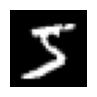

In [148]:
# I was forced to update tensorflow in environment to use on CNN
# load libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Lets confirm the shapes are what we want them to be
print(f"\nInput shapes:")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Lets reshape the data to be 4 dimensional to match layer input size for our CNN
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# Lets confirm the shapes are what we want them to be
print(f"\nUpdated shapes:")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Now lets look at the first image to confirm data properly loaded
fig = plt.figure(figsize=(1,1)) # Shrinks the image
plt.axis('off') 
plt.imshow(x_train[0], cmap="gray")

In [149]:
# Check for GPU support
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Tensorflow not utilizing GPU")
    print("Training may take a long time without using GPU")

# Show available devices
devices = tf.config.list_physical_devices()
print(f"\nAvailable devices:\n{devices}")

Tensorflow not utilizing GPU
Training may take a long time without using GPU

Available devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [150]:
# Now lets start to build the neural network
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]  # Lets confirm the number is a 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [151]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
# Create model
model = Sequential()

# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 2D convolutional layer with 64 filters
model.add(Conv2D(32, kernel_size=3, activation='relu')) # Second layer with 32 filters
model.add(Flatten()) # Turns previous layer into one dimension for the next dense layer
model.add(Dense(10, activation='softmax')) # Adds dense layer with 10 outputs for 10 digits. Softmax converts to probabilities

# Compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
# Train/fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1) # Would do more than 1 epoch but takes too long

1875/1875 [==============================] - 47s 25ms/step - loss: 0.2571 - accuracy: 0.9534 - val_loss: 0.0883 - val_accuracy: 0.9720


In [153]:
# Lets predict the test set
predicted = model.predict(x_test)
actual = y_test

# Convert predicted probabilities to class labels
predicted_indices = np.argmax(predicted, axis=1)
actual_indices = np.argmax(actual, axis=1)

# Lets compare the first 30 predictions to the actual values
print(predicted_indices[:30])
print(actual_indices[:30]) 

# Calculate accuracy as the fraction of correct predictions
accuracy = np.mean(predicted_indices == actual_indices)

# print the accuracy
print('Test set accuracy:', accuracy * 100, '%')


313/313 [==============================] - 1s 4ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Test set accuracy: 97.2 %


As we would expect we see that the predictions line up well with the test data on first 30 values. Lets be safe double check our results

In [154]:
# Now lets double check the first five numbers match their actual pictures
predicted_values = np.zeros(5)
actual_values = np.zeros(5)
for i in range(5):
    predicted_values[i] = np.argmax(predicted[i])
    actual_values[i] = np.argmax(actual[i])
print(f"predicted = {predicted_values}")
print(f"actual = {actual_values}")

predicted = [7. 2. 1. 0. 4.]
actual = [7. 2. 1. 0. 4.]


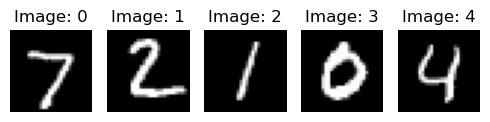

In [155]:
# Now lets plot the first 5 images in the test set to confirm the predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(5, 2))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Image: {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

<b> We can see that our predicted and actual values line up with what we would expect to see from the model. We also saw a test accuracy of  97.59% Which is to be expected for our neural network, and confirming the first values appears that the implementation of the CNN is correct

# Support Vector Machine

1. Pseudocode for an SVM classifier using a linear and separately an rbf kernel.<br><br>
2. Analyzes the runtime of your design in big O notation and calculate a total runtime such that each line of psuedocode is accounted for.<br><br>
3. Implementation of SVM using Python:<br><br>
    - Train three two class models using the Iris dataset as input training data, the Iris data will need to be reconfigured as a one vs. all or one vs. one data set.
    - Process the test data set to determine which class each test observation belongs to, in this problem you will simply use all 150 observations as your test data.
    - What is the classification accuracy?
    - Is there a difference in performance between the two kernels? 

# Part 1 Psuedocode #

Import libraries

Import iris

## function linear_kernel(x1, x2):<b> 
    return np.dot(x1, x2)

## function rbf_kernel(x1, x2, gamma): 
    distance = np.linalg.norm(x1 - x2) ** 2
    return np.exp(-gamma * distance)

## function train_SVM(x, x, options):

    kernel_name, arg, c = options['kernel'], options['arg'], options['c']
    mu = 1e-12
    num_data = x.shape
    
    K = kernel_SVM(x, x, kernel_name, arg)
    
    H = np.multiply(K, np.outer(y, y))
    H = H + (mu * np.eye(H.shape[0]))
        
    # Now set up the optimization problem
    P = cvxopt.matrix(P, tc='d')
    q = cvxopt.matrix(q, tc='d')
    G = cvxopt.matrix(G, tc='d')
    h = cvxopt.matrix(h, tc='d')
    A = cvxopt.matrix(A, tc='d')
    b = cvxopt.matrix(b, tc='d')
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    alpha = sol['x']
    epsi = 1e-12 
    
    # Now lets get the support and boundary vector boundaries
    sv_inx = where(alpha > epsi)
    boundary_inx = get boundary index locaiton
    dec_boundary = decision boundary formula # Confirmed with matlab

    prediction = K @ alpha + dec_boundary 
    temp = np.ones(num_data)
    temp[np.where(prediction < 0)] = -1 # set all values less than 0 to -1
    err = np.sum(np.abs(temp - y)) / num_data * 100

    model = {
        'alpha': alpha[sv_inx],
        'dec_boundary': dec_boundary,
        'options': options,
        'svX': x[sv_inx, :],
        'err': err,
        'sv_y': y[sv_inx],
        'sv_indx': np.where(sv_inx)[0],
        'numberSV': np.sum(sv_inx)
    }

    return model

## function classify_SVM(x, model):

    extract values from model
    K = kernel_SVM(x, svX, kernel, arg)
    prediction = np.dot(K, alpha) + dec_boundary
    return prediction


## functions SVM(kernel_name, arg, c):    

    # Add inputs to list options
    kernel_name, arg, c = options['kernel'], options['arg'], options['c']

    setosa = iris.data.toNumpy(replace setosa = 1, replace versicolor = -1, replace virginica = -1)
    versicolor = iris.data.toNumpy(replace setosa = -1, replace versicolor = 1, replace virginica = -1)
    virginica = iris.data.toNumpy(replace setosa = -1, replace versicolor = -1, replace virginica = 1)
    
    iris_y = setosa + versicolor + virginica
    iris_x = iris[features]

    # Train the models
    model1 = train_SVM(dataX, setosa_y, options)
    model2 = train_SVM(dataX, versicolor_y, options)
    model3 = train_SVM(dataX, virginica_y, options)

    # Now classify using the trained models
    ypred1 = rbf_classify(iris_x, model1)
    ypred2 = rbf_classify(iris_x, model2)
    ypred3 = rbf_classify(iris_x, model3)
    predictions = ypred1 + ypred2 + ypred3

    # Combine the predictions and calculate the accuracy
    tmp = pred_setosa + pred_versicolor + pred_virginica
    pred_classes = np.argmax(tmp)
    
    true_classes = iris_df.iloc[:, -1].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values
    accuracy = sum(pred_classes == true_classes) / len(true_classes) * 100
    misclassified = np.where(true_classes != pred_classes) # get indexes of misclassifications

    print(Kernel: {kernel_name})
    print(Arg: {arg})
    print(C: {c})
    print(Classification accuracy: {accuracy}%)
    print(Misclassified: {len(misclassified)})
    print(Misclassified Indices: {misclassified})
    print(Predicted valuess: {pred_classes})
    print(Actual Values: {true_classes})
 

## Part 2 O(n) Analysis: ##
The time complexity of the algorithm should be mostly impacted by the effect of the nested for loops to calculate the kernel functions this function brings the complexity to O(n^2)


## Part 3 Implementation:

In [156]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt

# This will define the different kernel functions
def kernel(x1, x2, kernel_name, arg):
    if kernel_name == 'linear': # Linear kernel
        k = x1.T @ x2
    elif kernel_name == 'rbf': # Radial Basis Function kernel
        squared_diff = np.sum((x1 - x2) ** 2)
        k = np.exp(-0.5 * squared_diff / (arg ** 2))
    else:
        raise ValueError(f"Invalid kernel type '{kernel_name}'")
    return k

In [157]:
# Validated
# This will choose the correct kernel function to use
def kernel_SVM(x1, x2, kernel_name, arg):
    row1 = x1.shape[0]
    row2 = x2.shape[0] 
    k = np.zeros((row1, row2))
    for i in range(row1):
        for j in range(row2):
            k[i, j] = kernel(x1[i, :], x2[j, :], kernel_name, arg)
    return k

In [158]:
# This class will train the SVM
def train_SVM(x, y, options):

    kernel_name, arg, c = options['kernel'], options['arg'], options['c']
    mu = 1e-7 # Compensates for floating point errors
    num_data = x.shape[0]
    
    K = kernel_SVM(x, x, kernel_name, arg)
    
    H = np.multiply(K, np.outer(y, y))
    H = H + (mu * np.eye(H.shape[0]))
        
    # Now set up the optimization problem
    P = np.outer(y,y) * H
    q = -np.ones(num_data)
    G = np.vstack([-np.eye(num_data), np.eye(num_data)])
    h = np.hstack([np.zeros(num_data), c*np.ones(num_data)])
    A = y.reshape(1,-1)
    b = np.array([0.])
    # print(f"\nP Shape: {P.shape}")
    # print(f"q Shape: {q.shape}")
    # print(f"G Shape: {G.shape}")
    # print(f"h Shape: {h.shape}")
    # print(f"A Shape: {A.shape}")
    # print(f"b Shape: {b.shape}")
    
    P = cvxopt.matrix(P, tc='d')
    q = cvxopt.matrix(q, tc='d')
    G = cvxopt.matrix(G, tc='d')
    h = cvxopt.matrix(h, tc='d')
    A = cvxopt.matrix(A, tc='d')
    b = cvxopt.matrix(b, tc='d')
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    alpha = np.array(sol['x']).flatten() # Output validated with matlab    
    epsi = 1e-7  # This is to compensate for float point arithmatic 
    
    # Now lets get the support and boundary vector boundaries
    sv_inx = np.where(alpha > epsi)[0]  
    boundary_inx = np.where(((c - epsi) > alpha) & (alpha > epsi))[0]

    if len(boundary_inx) > 0:
        dec_boundary = np.sum(y[boundary_inx] - (H[boundary_inx][:, sv_inx] @ (alpha[sv_inx] * y[sv_inx]))) / len(boundary_inx) 
    else:
        dec_boundary = 0
    
    prediction = K @ alpha + dec_boundary 
    temp = np.ones(num_data)
    temp[np.where(prediction < 0)] = -1 # set all values less than 0 to -1
    err = np.sum(np.abs(temp - y)) / num_data * 100
    
    model = {
        'alpha': alpha[sv_inx],
        'dec_boundary': dec_boundary,
        'options': options,
        'svX': x[sv_inx, :],
        'err': err,
        'sv_y': y[sv_inx],
        'sv_indx': np.where(sv_inx)[0],
        'numberSV': np.sum(sv_inx)
    }

    return model

In [159]:
def classify_SVM(x, model):
    alpha = model['alpha']
    dec_boundary = model['dec_boundary']
    svX = model['svX']
    kernel = model['options']['kernel']
    arg = model['options']['arg']

    K = kernel_SVM(x, svX, kernel, arg)
    prediction = np.dot(K, alpha) + dec_boundary
    return prediction

In [160]:
## Type the code for part 3 here ##

# We will implement an SVM classifier from scratch. This classifier will be one vs all
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def SVM(kernel_name, arg, c, n_splits=5):
    
    iris_df = pd.read_csv("iris.csv")
    options = {'kernel': kernel_name, 'arg': arg, 'c': c}

    # Now create one vs all arrays that are [150,]
    iris_setosa_y = iris_df.iloc[:, -1].replace({'setosa': 1, 'versicolor': -1, 'virginica': -1}).values
    iris_versicolor_y = iris_df.iloc[:, -1].replace({'setosa': -1, 'versicolor': 1, 'virginica': -1}).values
    iris_virginica_y = iris_df.iloc[:, -1].replace({'setosa': -1, 'versicolor': -1, 'virginica': 1}).values    
    iris_x = iris_df.iloc[:, 2:4].values # Will be [150 x 2] to match the matlab code
    
    scaler = StandardScaler()
    iris_x = scaler.fit_transform(iris_x) # Standardize the data
    
    # Train the models
    model1 = train_SVM(iris_x, iris_setosa_y, options)
    model2 = train_SVM(iris_x, iris_versicolor_y, options)
    model3 = train_SVM(iris_x, iris_virginica_y, options)

    # Classify the data using the trained models
    pred_setosa = classify_SVM(iris_x, model1)
    pred_versicolor = classify_SVM(iris_x, model2)
    pred_virginica = classify_SVM(iris_x, model3)

    # Combine the predictions and calculate the accuracy
    tmp = np.vstack((pred_setosa, pred_versicolor, pred_virginica)).T
    pred_classes = np.argmax(tmp, axis=1)
    
    true_classes = iris_df.iloc[:, -1].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values
    accuracy = (np.sum(pred_classes == true_classes) / len(true_classes)) * 100
    misclassified = np.where(true_classes != pred_classes)[0] # get indexes of misclassifications

    print(f'\nKernel:{kernel_name} Arg:{arg} C:{c}')
    print(f'Classification accuracy: {accuracy}%\n')
    print(f'Misclassified Indices: {misclassified}')
    print(f'Total Misclassified: {len(misclassified)}\n')
    #print(f'Predicted values:\n{pred_classes}\n')
    #print(f'Actual Values:\n{true_classes}\n')
    print("---------------------------------------------------------------")

## Part 3 Analysis

## Lets first look at and evaluate the regularization constant C:

In [161]:
# We will first test RBF kernel with different values of C
c_values = [1, 10, 100]
# Loop through the C values and test each one
for c in c_values:
    SVM("rbf", arg=.015, c=c)


Kernel:rbf Arg:0.015 C:1
Classification accuracy: 74.0%

Misclassified Indices: [ 5 12 13 16 18 19 20 22 23 24 26 43 44 54 55 56 58 59 61 62 64 67 69 70
 73 76 77 80 81 82 83 85 86 87 90 91 92 95 98]
Total Misclassified: 39

---------------------------------------------------------------

Kernel:rbf Arg:0.015 C:10
Classification accuracy: 98.66666666666667%

Misclassified Indices: [126 138]
Total Misclassified: 2

---------------------------------------------------------------

Kernel:rbf Arg:0.015 C:100
Classification accuracy: 99.33333333333333%

Misclassified Indices: [70]
Total Misclassified: 1

---------------------------------------------------------------


<b> RBF Kernel Regularization Constant (C) Analysis:

As expected we see that the accuracy increases when C is increased for our RBF kernel.

We see that as we increase C the harder the margin becomes and the less crossover is allowed. If we leave gamma the same we see that increasing c "hardens" the margin and increases classification accuracy, but at the risk of overfitting.

In [162]:
# Now lets look at the linear kernel with different values of C
c_values = [1, 10, 100]
# Loop through the C values and test each one
for c in c_values:
    SVM("linear", arg=None, c=c)


Kernel:linear Arg:None C:1
Classification accuracy: 86.0%

Misclassified Indices: [ 59  61  64  70  85 103 105 107 108 116 117 118 119 122 125 129 130 131
 133 134 137]
Total Misclassified: 21

---------------------------------------------------------------

Kernel:linear Arg:None C:10
Classification accuracy: 86.66666666666667%

Misclassified Indices: [ 59  61  70  85 103 105 107 108 116 117 118 119 122 125 129 130 131 133
 134 137]
Total Misclassified: 20

---------------------------------------------------------------

Kernel:linear Arg:None C:100
Classification accuracy: 88.66666666666667%

Misclassified Indices: [ 70 103 105 107 108 116 117 118 119 122 125 129 130 131 133 134 137]
Total Misclassified: 17

---------------------------------------------------------------


<b> Linear Kernel Regularization Constant (C) Analysis:

As expected again we see that misclassifications are minimized as we increase our regularization constant. Larger C values minimize misclassifications for both the linear and RBF kernels.

## Now lets look at adjusting gamma for RBF:

In [163]:
arg_values = [.01, .1, 1]
# Loop through the C values and test each one
for arg in arg_values:
    SVM("rbf", arg=arg, c=3)


Kernel:rbf Arg:0.01 C:3
Classification accuracy: 99.33333333333333%

Misclassified Indices: [70]
Total Misclassified: 1

---------------------------------------------------------------

Kernel:rbf Arg:0.1 C:3
Classification accuracy: 98.0%

Misclassified Indices: [ 54 126 138]
Total Misclassified: 3

---------------------------------------------------------------

Kernel:rbf Arg:1 C:3
Classification accuracy: 94.0%

Misclassified Indices: [52 56 70 72 76 77 83 85 86]
Total Misclassified: 9

---------------------------------------------------------------


<b> RBG Gamma (arg) Analysis:

With gamma low we see that the rbf creates smoother decision boundaries and allows for the model to generalize the classes well.

As we increase the gamma we see that the decision boundary becomes more complex, and we begin to see issues that are cause by overfitting of our decision boundary. This causes a decrease in the classification accuracy from overfitting.


## Overall Linear vs RBF

<b> We see that generally the linear and RBF kernels are both effective classifiers. The difference between the two kernels is that the RBF kernel allows for fitting to models that are not linearly seperable. The RBF function has the additional gamma hyperparamater that controls the rbf shape. This additional hyperparamater allows for the model to be more closely fitted to the data. The RBF beats out the linear classfier on accuracy in most cases with correctly chosen hyperparamaters. A drawback is the RBF function is much easier to accidently overfit if one does not correctly tune the gamma parameter. 

If the data were clearly linearly seperable it is even possible for the linear kernel to see better performance than the RBF kernel. Although this is not as likely for closely related data. The linear kernel is also less prone to overfitting since it constructs a simple hyperplane. This type of kernel benefits from its simplicity and by being less prone to overfitting. Plotting the data for the two features we are evaluating we see that the versicolor and virginica have a lot of overlapping sections, which is why the RBF functino returns a greater accuracy than the linear kernal(graph below)

In [165]:
#iris_df = pd.read_csv("iris.csv")

#sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df.iloc[:, -1])

## References<br><br>
[1] Charu C. Aggarwal, Neural Networks and Deep Learning, Springer 2018<br><br>
[2] Ahmad Abdolsaheb, How to make your Tic Tac Toe game unbeatable by using the minimax algorithm,
2020, https://www.freecodecamp.org/news/how-to-make-your-tic-tac-toe-game-unbeatable-byusing-
the-minimax-algorithm-9d690bad4b37/<br><br>
[3] Francois Chollet, Deep Learning with Python, Manning, 2018<br><br>
[4] Stephen Cook, The Complexity of Theorem Proving Procedures, Proceedings of the third annual ACM symposium<br><br>
on Theory of computing, pp. 151-158, 1971
[5] Ian Goodfellow, Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016,
https://www.deeplearningbook.org/<br><br>
[6] Patric Honner (Contributing Columnist), Why Winning in Rock-Paper-Scissors (and in Life) Isn’t Everything,
What does John Nash’s game theory equilibrium concept look like in Rock-Paper-Scissors?, an article in the
online Quanta Magazine, April 2, 2018, https://www.quantamagazine.org/the-game-theory-math-behindrock-
paper-scissors-20180402/<br><br>
[7] Richard M. Karp, Reducibility Among Combinatorial Problems, In R. E. Miller and J. W. Thatcher (editors),
Complexity of Computer Computations, New York: Plenum, pp. 85-103, 1972<br><br>
[8] Stephen G. Nash and Ariela Sofer, Linear and Nonlinear Programming, McGraw-Hill, 1996<br><br>
[9] Stuart Russell and Peter Norvig, Arti cial Intelligence a Modern Approach Fourth Edition, Pearson, 2020<br><br>
[10] Sergios Theodoridis and Konstantinos Koutroumbas, Pattern Recognition Third Edition, San Diego, CA:
Academic Press, 2006<br><br>
[11] Thomas H. Cormen, Charles E. Leiserson, Ronal L. Rivest and Cli ord Stein, Introduction to Algorithms,
3rd Edition, MIT Press, 2009<br><br>
[12] David Zuckerman, NP-Complete Problems Have a Version That’s Hard to Approximate, IEEE, Proceedings
of the Eighth Annual Structure in Complexity Theory Conference, pp. 305-312, 1993<br><br>
[13] David Zuckerman, On Unapproximable Versions of NP-Complete Problems, SIAM Journal on Computing,
Volume 25, Issue 6, pp. 1293-1304, 1996